In [1]:
import matplotlib.pyplot as plt
import rsatoolbox as rsa
import os
import globals as gl
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import pearsonr

plt.style.use('default')

Base directory found: /cifs/diedrichsen/data/Chord_exp/ExtFlexChord
Atlas directory found: /cifs/diedrichsen/data/Atlas_templates/fs_LR_32


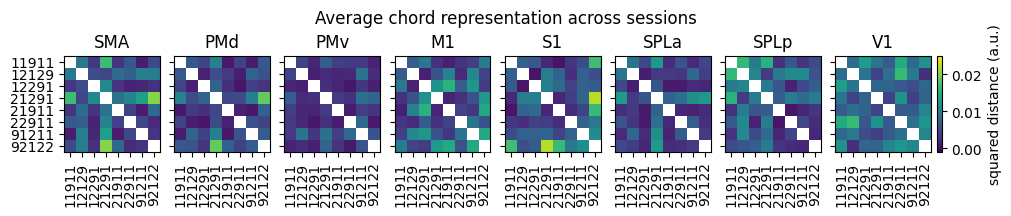

In [60]:
experiment = 'efc4'
vmin, vmax = -.001, .025
sn=101

Hem= 'L'
glm = 1
rois = ['SMA', 'PMd', 'PMv', 'M1', 'S1', 'SPLa', 'SPLp', 'V1']

fig, axs = plt.subplots(1, len(rois), sharex=True, sharey=True, figsize=(10, 2), constrained_layout=True)

for r, roi in enumerate(rois):

    ax = axs[r]

    rdms = rsa.rdm.load_rdm(os.path.join(gl.baseDir, experiment, gl.rdmDir, f'subj{sn}', f'glm{glm}.{Hem}.{roi}.hdf5'))
    conds = rdms.pattern_descriptors['conds']

    rdm = []
    for day in [3, 9, 23]:
        conds = [f'{day:02d},{chordID}' for chordID in gl.chordID]
        rdm_tmp = rdms.subset(by='ROI', value=roi)
        rdm_tmp = rdm_tmp.subset_pattern(by='conds', value=conds)
        rdm_tmp.pattern_descriptors['conds'] = [c.split(',')[1] for c in rdm_tmp.pattern_descriptors['conds']]
        rdm.append(rdm_tmp)

    rdm = rsa.rdm.rdms.concat(rdm).mean()

    cax = rsa.vis.show_rdm_panel(
            rdm, ax, cmap='viridis', vmin=vmin, vmax=vmax
        )

    ax.set_xticks(np.arange(len(rdm.pattern_descriptors['conds'])))
    ax.set_xticklabels(rdm.pattern_descriptors['conds'], rotation=90, ha='center')
    ax.set_yticks(ax.get_xticks())
    ax.set_yticklabels(rdm.pattern_descriptors['conds'])

    ax.set_title(roi)

cbar = fig.colorbar(cax, ax=ax, orientation='vertical', fraction=.05)
cbar.set_label('squared distance (a.u.)')

fig.suptitle('Average chord representation across sessions')

plt.show()
